In [1]:
##install kaggle
!pip install -q kaggle


In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shriramdayama","key":"17b1f47948b9cb1590848d84a17466f2"}'}

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [4]:
!chmod 600 ~/.kaggle/kaggle.json


In [5]:
!kaggle datasets download omkargurav/face-mask-dataset

100% 163M/163M [00:08<00:00, 23.1MB/s]
100% 163M/163M [00:08<00:00, 21.2MB/s]


In [6]:
!unzip face-mask-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: data/with_mask/with_mask_3297.jpg  
  inflating: data/with_mask/with_mask_3298.jpg  
  inflating: data/with_mask/with_mask_3299.jpg  
  inflating: data/with_mask/with_mask_33.jpg  
  inflating: data/with_mask/with_mask_330.jpg  
  inflating: data/with_mask/with_mask_3300.jpg  
  inflating: data/with_mask/with_mask_3301.jpg  
  inflating: data/with_mask/with_mask_3302.jpg  
  inflating: data/with_mask/with_mask_3303.jpg  
  inflating: data/with_mask/with_mask_3304.jpg  
  inflating: data/with_mask/with_mask_3305.jpg  
  inflating: data/with_mask/with_mask_3306.jpg  
  inflating: data/with_mask/with_mask_3307.jpg  
  inflating: data/with_mask/with_mask_3308.jpg  
  inflating: data/with_mask/with_mask_3309.jpg  
  inflating: data/with_mask/with_mask_331.jpg  
  inflating: data/with_mask/with_mask_3310.jpg  
  inflating: data/with_mask/with_mask_3311.jpg  
  inflating: data/with_mask/with_mask_3312.jpg  
  inflating: data/with

In [7]:
import numpy as np
import cv2
import os
from  google.colab.patches import cv2_imshow

In [8]:
img = cv2.imread('data/with_mask/with_mask_3388.jpg')
img

array([[[126, 126, 126],
        [124, 124, 124],
        [123, 123, 123],
        ...,
        [101, 101, 101],
        [101,  99,  99],
        [101,  96,  97]],

       [[130, 130, 130],
        [128, 128, 128],
        [126, 126, 126],
        ...,
        [100, 100, 100],
        [100,  98,  98],
        [101,  96,  97]],

       [[129, 129, 129],
        [129, 129, 129],
        [128, 128, 128],
        ...,
        [ 99,  99,  99],
        [101,  99,  99],
        [101,  96,  97]],

       ...,

       [[103, 107, 112],
        [104, 108, 113],
        [106, 110, 115],
        ...,
        [ 58,  56,  55],
        [ 58,  56,  56],
        [ 58,  56,  56]],

       [[104, 108, 113],
        [105, 109, 114],
        [107, 111, 116],
        ...,
        [ 59,  57,  56],
        [ 60,  58,  58],
        [ 60,  58,  58]],

       [[102, 106, 111],
        [103, 107, 112],
        [104, 108, 113],
        ...,
        [ 58,  56,  55],
        [ 59,  57,  57],
        [ 60,  58,  58]]

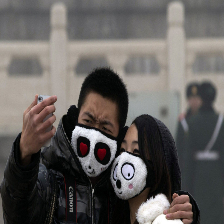

In [9]:
img = cv2.resize(img, (224,224))
cv2_imshow(img)  

In [10]:
categories = ['with_mask', 'without_mask']
data = []
for category in categories:
  path = 'data/'+ category
  for file in os.listdir(path):
    img = cv2.imread(path + '/'+ file)
    img = cv2.resize(img , (224,224))
    data.append([img, categories.index(category)])
    



In [11]:
data[3800][1]

1

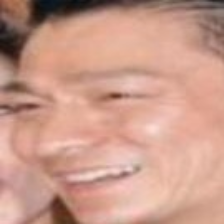

In [12]:
cv2_imshow(data[3800][0])

In [13]:
import random 
random.shuffle(data)

In [14]:
x = []
y = []
for feature, label in data:
  x.append(feature)
  y.append(label)

In [15]:
x = np.array(x)
y = np.array(y)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
31



31

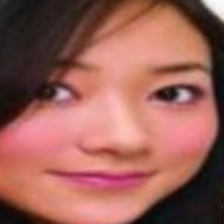

In [17]:
cv2_imshow(X_train[0])

In [18]:
from tensorflow.keras.applications.vgg16 import VGG16

In [19]:
vgg = VGG16()


553467096/553467096 [==============================] - 24s 0us/step


In [20]:
from tensorflow.keras import Sequential


In [21]:
model = Sequential()

In [22]:
for layer in vgg.layers[:-1]:
  model.add(layer)

In [23]:
for layer in model.layers:
  layer.trainable = False

In [24]:
from tensorflow.keras.layers import Dense
model.add(Dense(1, activation = 'sigmoid'))

In [25]:
model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [26]:
model.fit(X_train,y_train,epochs = 3)

Epoch 1/3
189/189 [==============================] - 41s 155ms/step - loss: 0.0630 - accuracy: 0.9750
Epoch 2/3
189/189 [==============================] - 26s 138ms/step - loss: 0.0213 - accuracy: 0.9927
Epoch 3/3
189/189 [==============================] - 26s 135ms/step - loss: 0.0110 - accuracy: 0.9972


In [27]:
model.evaluate(X_test,y_test)

48/48 [==============================] - 8s 162ms/step - loss: 0.0242 - accuracy: 0.9894


[0.024162236601114273, 0.9894109964370728]

In [28]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [33]:
def draw_label(img,text,pos,bg_color):
  text_size = cv2.getTextSize(text, cv2.FONT_HERSHEY_SIMPLEX,1,cv2.FILLED)
  x_end = pos[0] + text_size[0][0] + 2
  y_end = pos[1] + text_size[0][1] - 2

  cv2.rectangle(img, pos, (x_end,y_end),bg_color, cv2.FILLED)
  cv2.putText(img, text, pos, cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,0), 1, cv2.LINE_AA)

<IPython.core.display.Javascript object>

Saved to photo.jpg
1/1 [==============================] - 0s 31ms/step


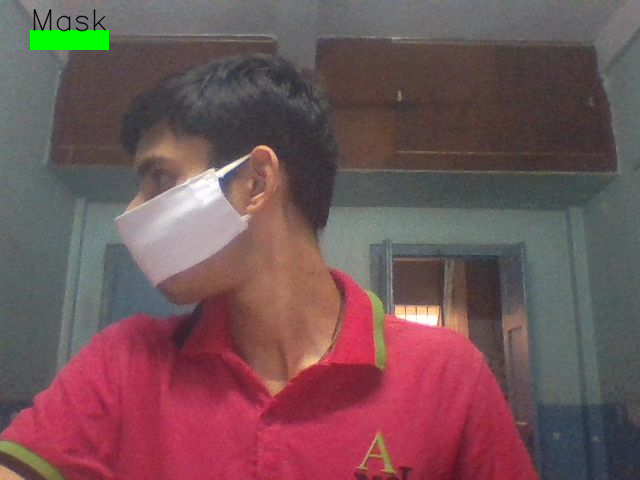

In [40]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image w31hich was just taken.
  #display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

  ##Determinig if the person is wearing a mask in image 
test_img = cv2.imread('photo.jpg')
test_img1 = cv2.resize(test_img, (224,224))
pred = (model.predict(test_img1.reshape(1,224,224,3)) > 0.5).astype("int32")

if pred == 0:
  draw_label(test_img, "Mask", (30,30), (0, 255, 0))
else:
  draw_label(test_img, "No Mask!!" , (30,30), (0,0,255))
cv2_imshow(test_img)